In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

In [16]:
h = 0.001
t = np.arange(0,3+h,h)

In [17]:
g = 9.81
L = 1 

In [18]:
def System(r,t,p):
    
    theta , omega = r
    
    dthetadt = omega
    domegadt = ((2*p[0]/p[1]- omega**2 *np.cos(theta)*np.sin(theta)))/(1/3+ np.sin(theta)**2)
   
    return [dthetadt,domegadt]

In [19]:
def Integrator2(f,r0,t,p):
    
    h = t[1] - t[0]
   
    
    theta= np.zeros_like(t)
    omega= np.zeros_like(t)
 
    theta[0] = r0[0]
    omega[0] = r0[1]
    
    
    K1 = np.zeros(2)
    K2 = np.zeros(2)
    
    # Las pendientes instantaneas
    R = np.zeros(2)

    for i in range(1,len(t)):
        
        R = np.array([theta[i-1],omega[i-1]])
        
        K1 = f(R,t[i-1],p)
        
        R = np.array([theta[i-1]+h*K1[0],omega[i-1]+h*K1[1]])
        
        K2 = f(R,t[i-1]+h,p)
        
        theta[i] = theta[i-1] + 0.5*h*(K1[0]+K2[0])
        omega[i] = omega[i-1] + 0.5*h*(K1[1]+K2[1])
       
        
      
    return theta,omega

In [20]:
r0=np.array([10*np.pi/180,0])
p=[g,L]

In [21]:
theta,omega = Integrator2(System,r0,t,p)

In [22]:
r = integrate.odeint(System,r0,t,args = (p,))

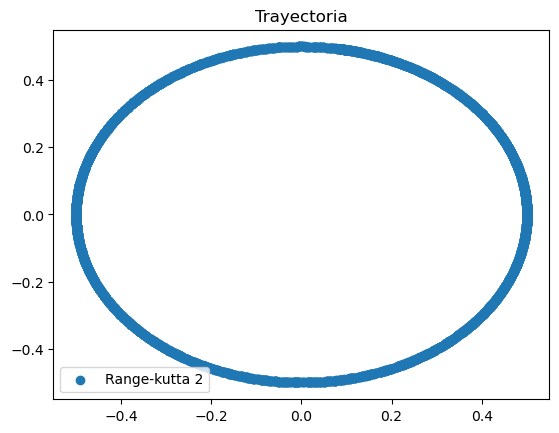

In [23]:
plt.scatter(L/2*np.sin(theta),L/2*np.cos(theta),label="Range-kutta 2")
plt.title(label="Trayectoria")
plt.legend()

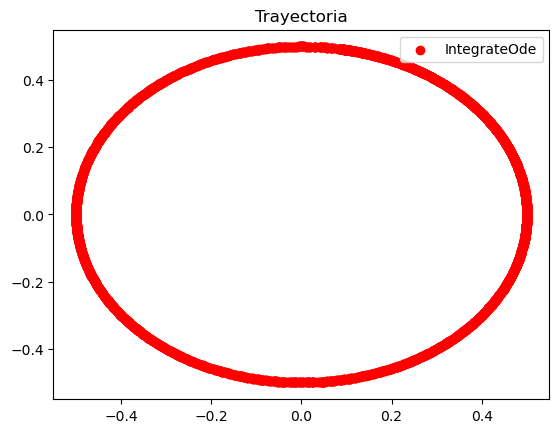

In [24]:
plt.scatter(L/2*np.sin(r[:,0]),L/2*np.cos(r[:,0]),label="IntegrateOde",c="r")
plt.title(label="Trayectoria")
plt.legend()

In [25]:
tcaida=[]
tol=1e-3
it=0

for i in range(len(t)):
    
    if theta[i] > np.pi/2-tol and theta[i]< np.pi/2 +tol:
        
        tcaida.append(t[i])
        it=i
    
    
t_prom=np.mean(tcaida)

In [12]:
t_prom

0.309

In [13]:
print(theta[it] , np.pi/2)

1.5703306418664045 1.5707963267948966


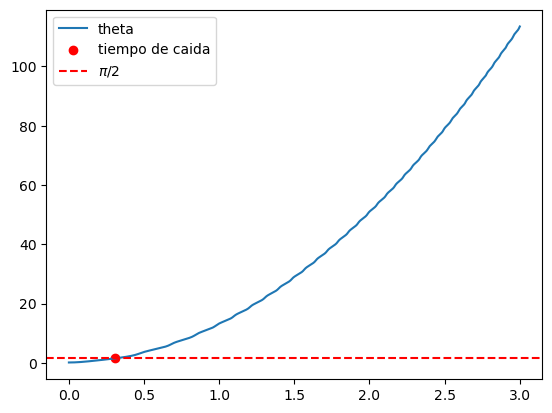

In [14]:
plt.plot(t,theta,label="theta")
plt.scatter(t_prom,theta[it],color="r",label="tiempo de caida")
plt.axhline(np.pi/2,ls="--",c="r",label="$\pi/2$")
plt.legend()